In [1]:
import os
import pandas as pd

In [4]:
os.chdir("D:/Machine learning/Unsupervised learning/Assignment")
os.getcwd()

'D:\\Machine learning\\Unsupervised learning\\Assignment'

In [2]:
IPL = pd.read_csv("ipl screened.csv")
IPL.head()

,Unnamed: 0,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,...,Inns.y,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w
0,1,Aaron Finch,10,9,1,134,46,16.75,100,134.00,...,0,0.0,0,0,0,0.0,0.0,0.0,0,0
1,2,AB de Villiers,12,11,2,480,90,53.33,275,174.54,...,0,0.0,0,0,0,0.0,0.0,0.0,0,0
2,3,Abhishek Sharma,3,3,2,63,46,63.00,33,190.90,...,0,0.0,0,0,0,0.0,0.0,0.0,0,0
3,4,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,...,0,0.0,0,0,0,0.0,0.0,0.0,0,0
4,5,Alex Hales,6,6,0,148,45,24.66,118,125.42,...,0,0.0,0,0,0,0.0,0.0,0.0,0,0


In [3]:
IPL = IPL[['PLAYER', 'Mat.x', 'Inns.x', 'NO', 'Runs.x', 'HS',
       'Avg.x', 'BF', 'SR.x', 'X100', 'X50', 'X4s', 'X6s', 'Mat.y', 'Inns.y',
       'Ov', 'Runs.y', 'Wkts', 'BBI', 'Avg.y', 'Econ', 'SR.y', 'X4w', 'X5w']]

In [4]:
IPL.columns

Index(['PLAYER', 'Mat.x', 'Inns.x', 'NO', 'Runs.x', 'HS', 'Avg.x', 'BF',
       'SR.x', 'X100', 'X50', 'X4s', 'X6s', 'Mat.y', 'Inns.y', 'Ov', 'Runs.y',
       'Wkts', 'BBI', 'Avg.y', 'Econ', 'SR.y', 'X4w', 'X5w'],
      dtype='object')

In [5]:
## Hierarchical Clustering with Scaling
from sklearn.preprocessing import scale as scale

In [6]:
scaled_IPL = scale(IPL.iloc[:,1:24])
scaled_IPL

array([[ 0.4480029 ,  0.54491687, -0.1550601 , ..., -0.98047992,
        -0.18172434, -0.08391814],
       [ 0.77823185,  0.90989631,  0.46087308, ..., -0.98047992,
        -0.18172434, -0.08391814],
       [-0.7077984 , -0.55002147,  0.46087308, ..., -0.98047992,
        -0.18172434, -0.08391814],
       ...,
       [-1.20314182, -1.09749065, -0.77099328, ...,  0.21042432,
        -0.18172434, -0.08391814],
       [-1.20314182, -1.09749065, -0.77099328, ..., -0.12183423,
        -0.18172434, -0.08391814],
       [-1.20314182, -1.09749065, -0.77099328, ...,  0.88614116,
        -0.18172434, -0.08391814]])

In [7]:
## Distance Computation
from scipy.spatial.distance import pdist, squareform

In [8]:
d_euc = pdist(scaled_IPL, metric  = "euclidean")
d_euc

array([6.41435879, 3.42586635, 3.45117116, ..., 5.95122126, 1.63454471,
       5.26462439])

In [9]:
## Building the Clusters
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
clus1 = linkage(d_euc, method = "ward")

In [10]:
import matplotlib.pyplot as plt
dendrogram(clus1, 
           labels=IPL.iloc[:,[0]].values.tolist())
plt.xlabel('hclust')
plt.ylabel('Distance')
plt.suptitle('Cluster Dendrogram', 
             fontweight='bold', fontsize=14)
plt.show()

In [11]:
import numpy as np
print(np.round(squareform(d_euc).tolist(),3))

[[ 0.     6.414  3.426 ...  7.77   5.661  7.278]
 [ 6.414  0.     6.82  ... 11.258  9.92  10.924]
 [ 3.426  6.82   0.    ...  8.482  6.605  8.035]
 ...
 [ 7.77  11.258  8.482 ...  0.     5.951  1.635]
 [ 5.661  9.92   6.605 ...  5.951  0.     5.265]
 [ 7.278 10.924  8.035 ...  1.635  5.265  0.   ]]


In [12]:
## Profiling Step
IPL['Clusters'] = cut_tree(clus1, 3)
clus_profile = IPL.iloc[:,1:25].groupby(['Clusters'], as_index=False).mean()
clus_profile 

,Clusters,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Inns.y,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w
0,0,10.961538,10.480769,1.692308,287.365385,63.461538,30.971923,204.942308,136.249808,0.096154,...,0.403846,0.790385,7.057692,0.230769,0.0,2.400577,0.667115,1.524038,0.000000,0.000000
1,1,8.742857,5.600000,1.514286,73.685714,21.542857,9.616857,51.200000,87.801143,0.000000,...,12.942857,44.371429,358.285714,13.685714,0.0,26.988571,8.056000,20.076571,0.228571,0.028571
2,2,2.964286,2.125000,0.678571,25.071429,12.267857,8.752143,20.357143,56.395893,0.000000,...,4.321429,12.512500,119.946429,3.053571,0.0,31.415714,10.071250,19.569821,0.000000,0.000000


## K means

In [13]:
IPL = pd.read_csv("ipl screened.csv")
IPL.head()

,Unnamed: 0,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,...,Inns.y,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w
0,1,Aaron Finch,10,9,1,134,46,16.75,100,134.00,...,0,0.0,0,0,0,0.0,0.0,0.0,0,0
1,2,AB de Villiers,12,11,2,480,90,53.33,275,174.54,...,0,0.0,0,0,0,0.0,0.0,0.0,0,0
2,3,Abhishek Sharma,3,3,2,63,46,63.00,33,190.90,...,0,0.0,0,0,0,0.0,0.0,0.0,0,0
3,4,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,...,0,0.0,0,0,0,0.0,0.0,0.0,0,0
4,5,Alex Hales,6,6,0,148,45,24.66,118,125.42,...,0,0.0,0,0,0,0.0,0.0,0.0,0,0


In [14]:
IPL = IPL[['PLAYER', 'Mat.x', 'Inns.x', 'NO', 'Runs.x', 'HS',
       'Avg.x', 'BF', 'SR.x', 'X100', 'X50', 'X4s', 'X6s', 'Mat.y', 'Inns.y',
       'Ov', 'Runs.y', 'Wkts', 'BBI', 'Avg.y', 'Econ', 'SR.y', 'X4w', 'X5w']]

In [15]:
## Scaling
from sklearn.preprocessing import scale as scale
scaled_IPL = scale(IPL.iloc[:,1:24])

In [16]:
scaled_IPL

array([[ 0.4480029 ,  0.54491687, -0.1550601 , ..., -0.98047992,
        -0.18172434, -0.08391814],
       [ 0.77823185,  0.90989631,  0.46087308, ..., -0.98047992,
        -0.18172434, -0.08391814],
       [-0.7077984 , -0.55002147,  0.46087308, ..., -0.98047992,
        -0.18172434, -0.08391814],
       ...,
       [-1.20314182, -1.09749065, -0.77099328, ...,  0.21042432,
        -0.18172434, -0.08391814],
       [-1.20314182, -1.09749065, -0.77099328, ..., -0.12183423,
        -0.18172434, -0.08391814],
       [-1.20314182, -1.09749065, -0.77099328, ...,  0.88614116,
        -0.18172434, -0.08391814]])

In [47]:
## Identifying the optimal number of clusters 
# elbow method

In [17]:
cluster_range = range( 1, 6 )  ## number of iterations or number of clusters, here making 5 iterations , can take any number of iterations
cluster_wss = []

In [18]:
from sklearn.cluster import KMeans
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit(scaled_IPL)
  cluster_wss.append( clusters.inertia_ )

In [19]:
from collections import OrderedDict
clusters_df = pd.DataFrame( OrderedDict ( 
        {"num_clusters": cluster_range, 
        "cluster_wss": cluster_wss }
        ) )
clusters_df[0:5]

,num_clusters,cluster_wss
0,1,3146.000000
1,2,2086.355658
2,3,1649.674868
3,4,1359.486020
4,5,1201.720906


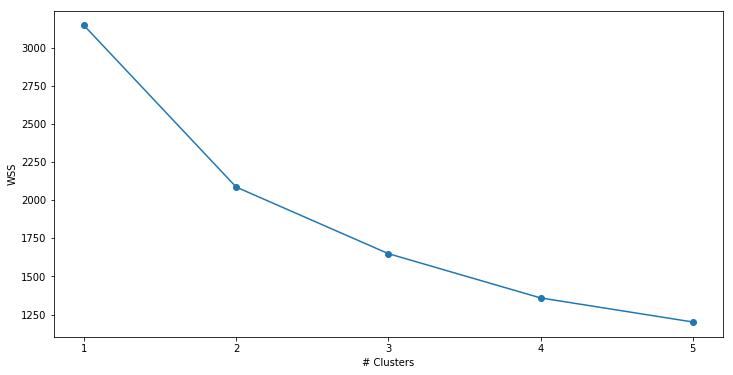

In [20]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,6))
plt.xlabel('# Clusters')
plt.ylabel('WSS')
plt.xticks(np.arange(min(clusters_df.num_clusters), 
                     max(clusters_df.num_clusters)+1, 
                     1.0))
plt.plot( clusters_df.num_clusters, 
         clusters_df.cluster_wss, 
         marker = "o" )

In [21]:
## profiling the clusters
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(scaled_IPL)
cluster_labels
IPL['Clusters'] = cluster_labels

In [22]:
clus_profile = IPL.iloc[:,1:25].groupby(['Clusters'], 
                       as_index=False).mean()
clus_profile

,Clusters,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Inns.y,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w
0,0,11.800000,7.600000,2.400000,100.800000,32.257143,18.919429,70.714286,138.734000,0.000000,...,11.114286,35.451429,299.542857,9.714286,0.0,38.879714,8.711143,26.321429,0.142857,0.000000
1,1,14.500000,14.388889,2.500000,516.277778,88.833333,44.907222,352.944444,146.323889,0.277778,...,0.611111,1.555556,13.944444,0.333333,0.0,2.323889,0.497778,1.555556,0.000000,0.000000
2,2,0.395833,0.333333,0.083333,2.104167,1.479167,0.912917,2.375000,9.951250,0.000000,...,6.020833,20.368750,176.416667,6.291667,0.0,27.728333,9.640208,17.725208,0.062500,0.020833
3,3,8.309524,7.595238,1.095238,142.952381,46.238095,21.974286,110.642857,127.357619,0.000000,...,0.642857,1.150000,10.023810,0.333333,0.0,2.265000,2.477619,1.851905,0.000000,0.000000


In [23]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(scaled_IPL)

In [24]:
## Getting a Visual Plot 
## Defining Colours and Labels for the Plot
def color_fun (row):
   if (row['Clusters'] == 0):
      return "red"
   if (row['Clusters'] == 1):
      return "brown"
   if (row['Clusters'] == 2):
      return "blue"
   if (row['Clusters'] == 3):
      return "yellow"
   return 0

In [25]:
IPL['color'] = IPL.apply (lambda row: color_fun(row), axis=1)

plot_labels = IPL.iloc[:,[1]].values.ravel()

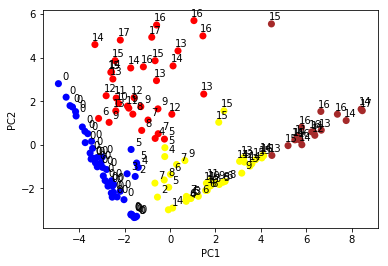

In [26]:
## Show the Cluster Plot
plt.scatter(x=plot_columns[:,0], 
            y=plot_columns[:,1],
            c=IPL['color'].values.tolist(),
            s=50, edgecolors='none')
for label, x, y in zip(
        plot_labels, plot_columns[:,0], 
        plot_columns[:,1]) :
    plt.annotate(
    label,
    xy=(x, y), xytext=(10, 2),
    textcoords='offset points', ha='right', va='bottom',
    )
    plt.xlabel('PC1')
    plt.ylabel('PC2')

plt.show()